# Do Opposites Attract?

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Save each file path to a variable
sd_csv = "Resources/speed_dating_data.csv"

# Import the file into two seperate dataframes: one for the individual's data (iid) and the second for the partner's data (pid)
ind_df = pd.read_csv(sd_csv, encoding="ISO-8859-1")
par_df = pd.read_csv(sd_csv, encoding="ISO-8859-1")

In [2]:
ind_df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Data Exploration & Clean Up

The original dataset contains 195 columns, all of which are explained in the accompanying speed dating data key.

Each row of the dataset corresponds to an individual's (iid) speed dating experience with a specific partner (pid), as well as additional information related to that person's views on the experience, their career,  age,  race, interests, intention, etc.

In order to analyze each speed date, the original dataset has been saved into two seperate dataframes, one corresponding to the individual's responses (ind_df), and the other for their partner's responses (par_df). Since the group was investigatin

For instance, when investigating age

In [2]:
combo_df = pd.merge(clean_ind,clean_par, left_on = 'iid',right_on='pid')
combo_df = combo_df[combo_df['pid_x'] == combo_df['iid_y']]
combo_df

found = []
found_sets = []
for x, y in zip(combo_df['pid_x'], combo_df['iid_x']):
    if set([x, y]) in found_sets:
        found.append(False)
    else:
        found.append(True)
        found_sets.append(set([x, y]))
combo_df = combo_df[found]

combo_df.head()

NameError: name 'clean_ind' is not defined

To investigate the impact of interest 

In [19]:
clean_ind = ind_df.copy()
clean_ind = clean_ind[["iid","gender","pid","match","age","race","career_c","goal",
                       "sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing",
                       "reading","tv","theater","movies","concerts","music","shopping","yoga","dec"]]
clean_par = par_df.copy()
clean_par = clean_par[["iid","gender","pid","age","race","career_c","goal",
                       "sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing",
                       "reading","tv","theater","movies","concerts","music","shopping","yoga","dec"]]
combo_df = pd.merge(clean_ind,clean_par, left_on = 'iid',right_on='pid',suffixes=("_ind", "_par"))
combo_df = combo_df[combo_df['pid_ind'] == combo_df['iid_par']]

found = []
found_sets = []
for x, y in zip(combo_df['iid_ind'], combo_df['pid_ind']):
    if set([x, y]) in found_sets:
        found.append(False)
    else:
        found.append(True)
        found_sets.append(set([x, y]))
combo_df = combo_df[found]


#combo_df = combo_df.dropna(subset=['sports_ind','sports_par'])

combo_df.head()

,iid_ind,gender_ind,pid_ind,match,age_ind,race_ind,career_c_ind,goal_ind,sports_ind,tvsports_ind,...,clubbing_par,reading_par,tv_par,theater_par,movies_par,concerts_par,music_par,shopping_par,yoga_par,dec_par
0,1,0,11.0,0,21.0,4.0,NaN,2.0,9.0,2.0,...,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,0
11,1,0,12.0,0,21.0,4.0,NaN,2.0,9.0,2.0,...,5.0,6.0,6.0,4.0,7.0,7.0,9.0,5.0,5.0,0
22,1,0,13.0,1,21.0,4.0,NaN,2.0,9.0,2.0,...,7.0,6.0,8.0,10.0,8.0,9.0,9.0,8.0,1.0,1
33,1,0,14.0,1,21.0,4.0,NaN,2.0,9.0,2.0,...,8.0,6.0,7.0,3.0,10.0,6.0,8.0,6.0,1.0,1
44,1,0,15.0,1,21.0,4.0,NaN,2.0,9.0,2.0,...,9.0,8.0,6.0,9.0,9.0,6.0,7.0,2.0,1.0,1


In [20]:
for ind_int in combo_df.columns.values[6:23]:
    combo_df = combo_df.drop(combo_df[combo_df[ind_int] > 10].index)
    combo_df = combo_df.drop(combo_df[combo_df[ind_int] < 1].index)
for ind_int in combo_df.columns.values[30:-2]:
    combo_df = combo_df.drop(combo_df[combo_df[ind_int] > 10].index)
    combo_df = combo_df.drop(combo_df[combo_df[ind_int] < 1].index)

In [21]:
combo_df.columns.values

array(['iid_ind', 'gender_ind', 'pid_ind', 'match', 'age_ind', 'race_ind',
       'career_c_ind', 'goal_ind', 'sports_ind', 'tvsports_ind',
       'exercise_ind', 'dining_ind', 'museums_ind', 'art_ind',
       'hiking_ind', 'gaming_ind', 'clubbing_ind', 'reading_ind',
       'tv_ind', 'theater_ind', 'movies_ind', 'concerts_ind', 'music_ind',
       'shopping_ind', 'yoga_ind', 'dec_ind', 'iid_par', 'gender_par',
       'pid_par', 'age_par', 'race_par', 'career_c_par', 'goal_par',
       'sports_par', 'tvsports_par', 'exercise_par', 'dining_par',
       'museums_par', 'art_par', 'hiking_par', 'gaming_par',
       'clubbing_par', 'reading_par', 'tv_par', 'theater_par',
       'movies_par', 'concerts_par', 'music_par', 'shopping_par',
       'yoga_par', 'dec_par'], dtype=object)

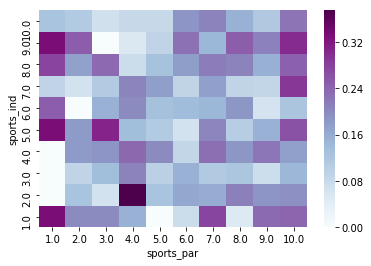

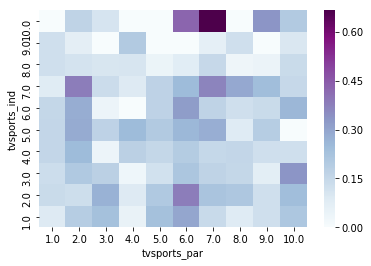

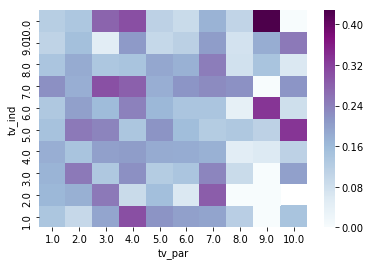

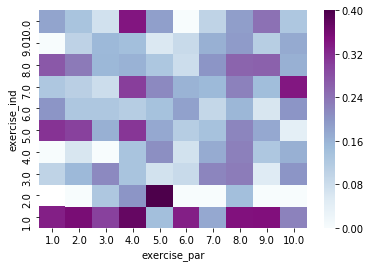

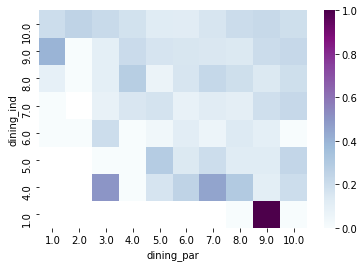

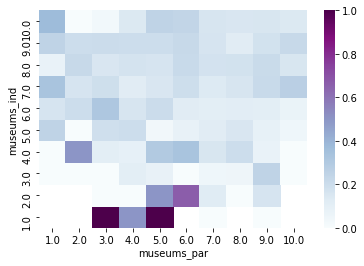

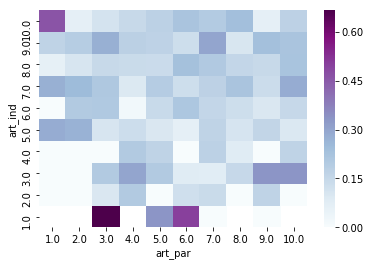

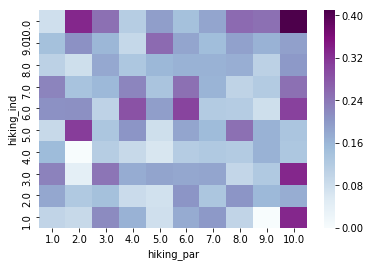

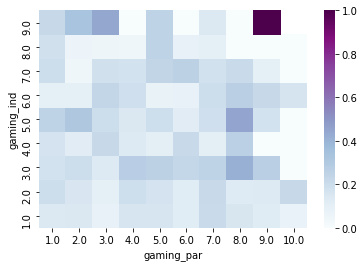

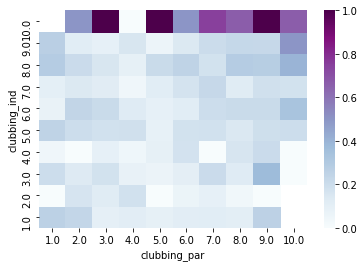

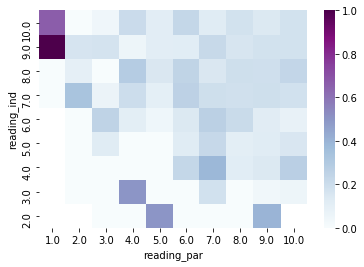

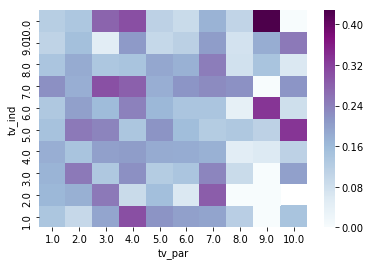

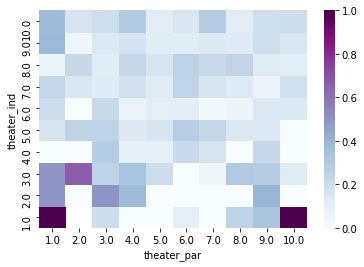

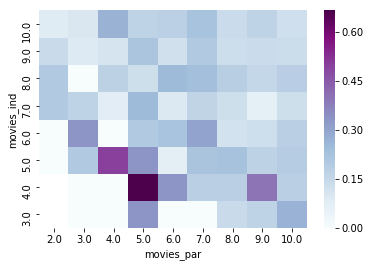

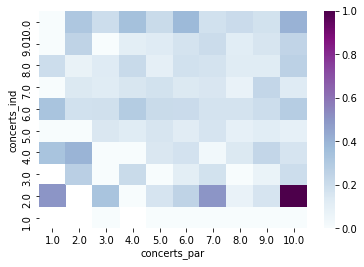

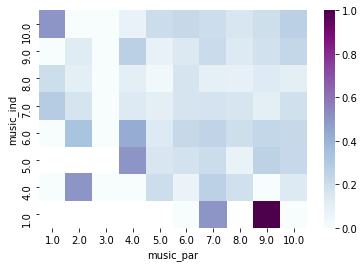

In [22]:
prefixes = ["sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing",
                       "reading","tv","theater","movies","concerts","music","shopping","yoga"]

activites_df = combo_df.copy()

for interest in activites_df.columns.values[6:23]:
    for prefix in prefixes:
        if interest.startswith(prefix):
            specific_df = activites_df[[f'{prefix}_ind',f'{prefix}_par','match']]
            specific_df = specific_df.pivot_table('match',f'{prefix}_ind',f'{prefix}_par',aggfunc=np.average)
            ax = sns.heatmap(specific_df,cmap='BuPu')
            ax.invert_yaxis()
            plt.show()
            #specific_df = specific_df.pivot(index=f'{prefix}_ind',columns = f'{prefix}_par',values = 'match')
            #sns.heatmap(specific_df,cmap='BuPu')



In [23]:
# Create a copy of the original dataframe to ensure that nothing is changes in the original
interest_df = combo_df.copy()

prefixes = ["sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing",
                       "reading","tv","theater","movies","concerts","music","shopping","yoga"]

pairing_int = []

for interest in interest_df.columns.values:
    for prefix in prefixes:
        if interest.startswith(prefix) and interest.endswith('ind'):
            interest_df[prefix] = abs(interest_df[prefix + '_ind'] - interest_df[prefix + '_par'])

interest_df.head()

,iid_ind,gender_ind,pid_ind,match,age_ind,race_ind,career_c_ind,goal_ind,sports_ind,tvsports_ind,...,hiking,gaming,clubbing,reading,theater,movies,concerts,music,shopping,yoga
0,1,0,11.0,0,21.0,4.0,NaN,2.0,9.0,2.0,...,0.0,4.0,1.0,3.0,3.0,2.0,3.0,1.0,3.0,0.0
11,1,0,12.0,0,21.0,4.0,NaN,2.0,9.0,2.0,...,2.0,2.0,0.0,0.0,3.0,3.0,3.0,0.0,3.0,4.0
22,1,0,13.0,1,21.0,4.0,NaN,2.0,9.0,2.0,...,1.0,6.0,2.0,0.0,9.0,2.0,1.0,0.0,0.0,0.0
33,1,0,14.0,1,21.0,4.0,NaN,2.0,9.0,2.0,...,5.0,7.0,3.0,0.0,2.0,0.0,4.0,1.0,2.0,0.0
44,1,0,15.0,1,21.0,4.0,NaN,2.0,9.0,2.0,...,1.0,6.0,4.0,2.0,8.0,1.0,4.0,2.0,6.0,0.0


In [25]:
interests_df = combo_df.copy()



interests_df['sports'] = abs(interests_df['sports_ind'] - interests_df['sports_par'])
interests_df['tvsports'] = abs(interests_df['tvsports_ind'] - interests_df['tvsports_par'])
interests_df['exercise'] = abs(interests_df['exercise_ind'] - interests_df['exercise_par'])
interests_df['dining'] = abs(interests_df['dining_ind'] - interests_df['dining_par'])
interests_df['museums'] = abs(interests_df['museums_ind'] - interests_df['museums_par'])
interests_df['art'] = abs(interests_df['art_ind'] - interests_df['art_par'])
interests_df['hiking'] = abs(interests_df['hiking_ind'] - interests_df['hiking_par'])
interests_df['gaming'] = abs(interests_df['gaming_ind'] - interests_df['gaming_par'])
interests_df['clubbing'] = abs(interests_df['clubbing_ind'] - interests_df['clubbing_par'])
interests_df['reading'] = abs(interests_df['reading_ind'] - interests_df['reading_par'])
interests_df['tv'] = abs(interests_df['tv_ind'] - interests_df['tv_par'])
interests_df['theater'] = abs(interests_df['theater_ind'] - interests_df['theater_par'])
interests_df['movies'] = abs(interests_df['movies_ind'] - interests_df['movies_par'])
interests_df['concerts'] = abs(interests_df['concerts_ind'] - interests_df['concerts_par'])
interests_df['music'] = abs(interests_df['music_ind'] - interests_df['music_par'])
interests_df['shopping'] = abs(interests_df['shopping_ind'] - interests_df['shopping_par'])
interests_df['yoga'] = abs(interests_df['yoga_ind'] - interests_df['yoga_par'])
interests_df = interests_df[['iid_ind', 'gender_ind', 'iid_par', 'gender_par','match',  'sports',
       'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
       'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
       'concerts', 'music', 'shopping', 'yoga']]
interests_df.head()

,iid_ind,gender_ind,iid_par,gender_par,match,sports,tvsports,exercise,dining,museums,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,1,0,11,1,0,1.0,5.0,6.0,3.0,6.0,...,4.0,1.0,3.0,7.0,3.0,2.0,3.0,1.0,3.0,0.0
11,1,0,12,1,0,0.0,5.0,1.0,1.0,6.0,...,2.0,0.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,4.0
22,1,0,13,1,1,2.0,6.0,6.0,0.0,4.0,...,6.0,2.0,0.0,1.0,9.0,2.0,1.0,0.0,0.0,0.0
33,1,0,14,1,1,1.0,4.0,0.0,1.0,2.0,...,7.0,3.0,0.0,2.0,2.0,0.0,4.0,1.0,2.0,0.0
44,1,0,15,1,1,0.0,5.0,1.0,2.0,3.0,...,6.0,4.0,2.0,3.0,8.0,1.0,4.0,2.0,6.0,0.0


In [107]:
matched_interests.columns.values[8:]

array(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
       'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga'], dtype=object)

In [10]:
matched_interests = interests_df.copy()
matched_interests = matched_interests[matched_interests['match'] == 1]
unmatched_interests = interests_df.copy()
unmatched_interests = unmatched_interests[unmatched_interests['match'] == 0]
total_matched = matched_interests['match'].count()
total_unmatched = unmatched_interests['match'].count()

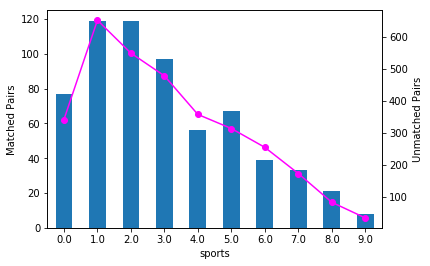

According to the chi-square test, the p-value for sports was 0.9999999999903286.


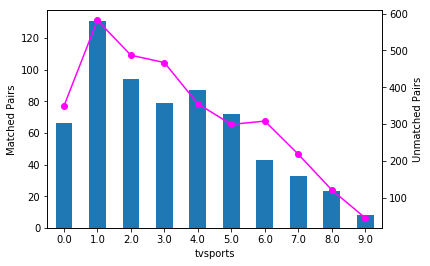

According to the chi-square test, the p-value for tvsports was 0.9999999998858795.


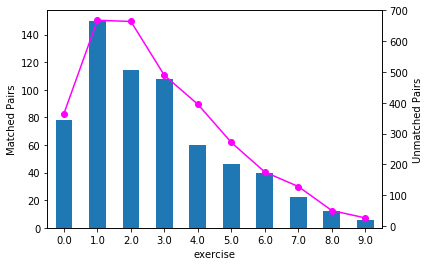

According to the chi-square test, the p-value for exercise was 0.9999999999736419.


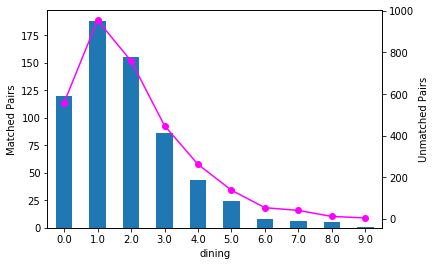

According to the chi-square test, the p-value for dining was 0.9999999999985983.


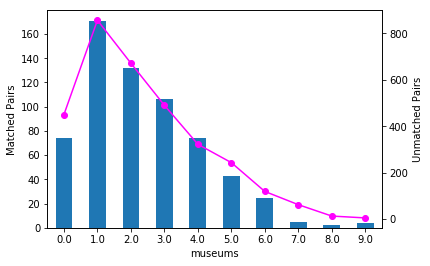

According to the chi-square test, the p-value for museums was 0.999999999874795.


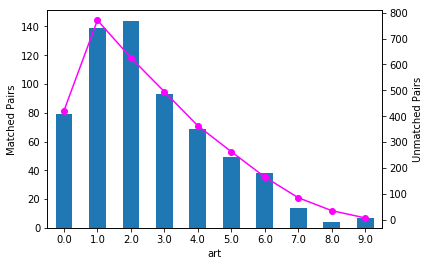

According to the chi-square test, the p-value for art was 0.9999999990085822.


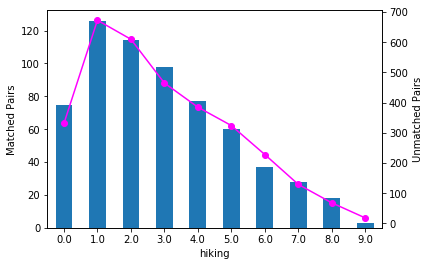

According to the chi-square test, the p-value for hiking was 0.9999999999992837.


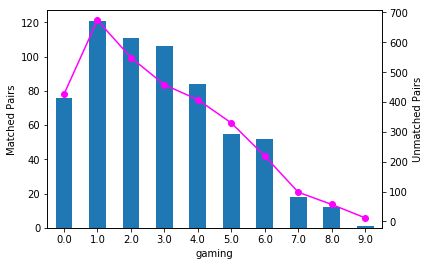

According to the chi-square test, the p-value for gaming was 0.9999999999958262.


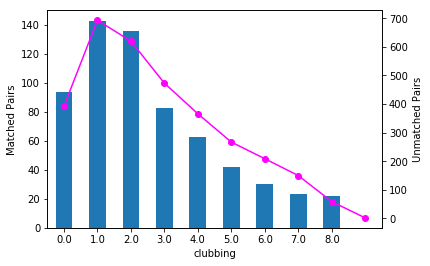

According to the chi-square test, the p-value for clubbing was 0.999999999667399.


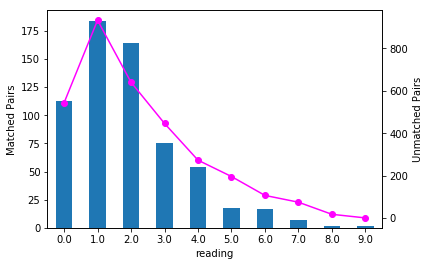

According to the chi-square test, the p-value for reading was 0.9999999935300311.


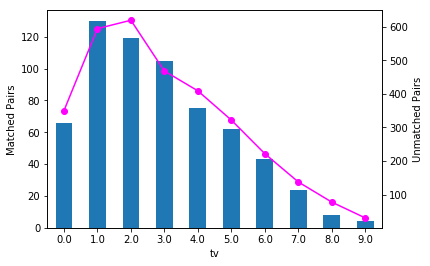

According to the chi-square test, the p-value for tv was 0.9999999999969297.


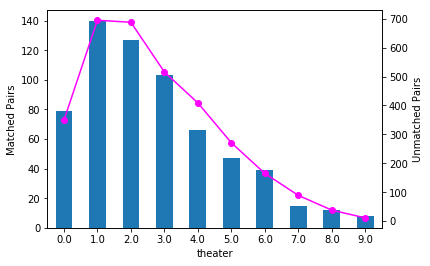

According to the chi-square test, the p-value for theater was 0.9999999995580826.


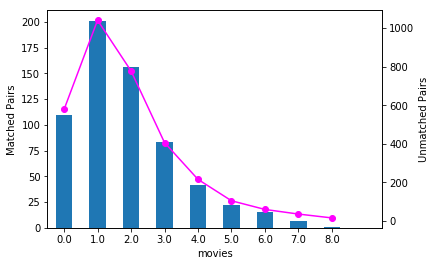

According to the chi-square test, the p-value for movies was 0.9999999999989603.


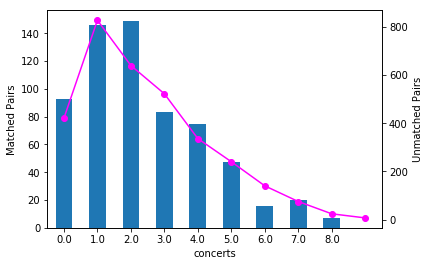

According to the chi-square test, the p-value for concerts was 0.9999999998033814.


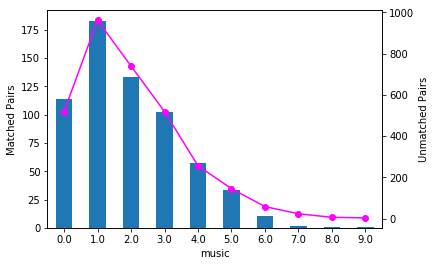

According to the chi-square test, the p-value for music was 0.9999999999992779.


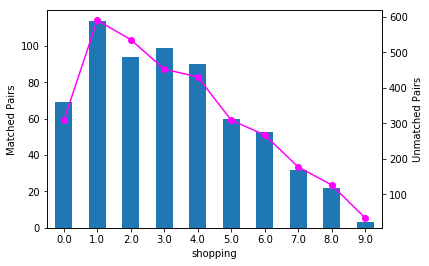

According to the chi-square test, the p-value for shopping was 0.999999999999194.


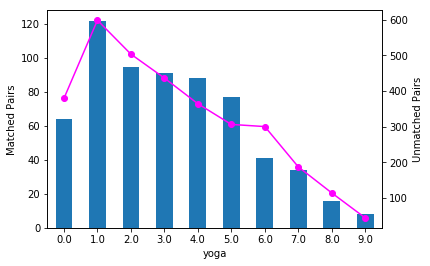

According to the chi-square test, the p-value for yoga was 0.9999999999060925.


In [15]:
for interest in matched_interests.columns.values[8:]:
    m_group = matched_interests.groupby(interest)
    u_group = unmatched_interests.groupby(interest)
    m_count = m_group['match'].count()
    u_count = u_group['match'].count()
    fig, ax = plt.subplots()
    m_count.plot(kind = 'bar')
    plt.ylabel('Matched Pairs')
    u_count.plot(kind = 'line', marker = 'o', secondary_y = True, color='magenta')
    ax.set_xbound(lower=-0.5,upper=9.5)
    plt.ylabel('Unmatched Pairs',rotation = 90,labelpad=5)
    #ax.set_ylabel('testing',labelpad=5)
    ax.set_title(f'')
    plt.show()

    interest_df = pd.DataFrame(dict(matched = m_count, unmatched = u_count))
    interest_df = interest_df.fillna(0)
    interest_df['expected'] = interest_df['unmatched']/total_unmatched
    interest_df['observed'] = interest_df['matched']/total_matched
    pval = stats.chisquare(interest_df['observed'], interest_df['expected']).pvalue
    print(f'According to the chi-square test, the p-value for {interest} was {pval}.') 

While all the interest graphs for couples that matched showed that as 

In [163]:
combo_df.columns.values

array(['iid_ind', 'gender_ind', 'pid_ind', 'match', 'round',
       'int_corr_ind', 'sports_ind', 'tvsports_ind', 'exercise_ind',
       'dining_ind', 'museums_ind', 'art_ind', 'hiking_ind', 'gaming_ind',
       'clubbing_ind', 'reading_ind', 'tv_ind', 'theater_ind',
       'movies_ind', 'concerts_ind', 'music_ind', 'shopping_ind',
       'yoga_ind', 'dec_ind', 'match_es_ind', 'iid_par', 'gender_par',
       'pid_par', 'int_corr_par', 'sports_par', 'tvsports_par',
       'exercise_par', 'dining_par', 'museums_par', 'art_par',
       'hiking_par', 'gaming_par', 'clubbing_par', 'reading_par',
       'tv_par', 'theater_par', 'movies_par', 'concerts_par', 'music_par',
       'shopping_par', 'yoga_par', 'dec_par', 'match_es_par'],
      dtype=object)

In [183]:
# Dislike = 1,2,3
# Neutral = 4,5,6,7
# Like = 8,9,10

nps_activities =  combo_df.copy()

prefixes = ["sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing",
                       "reading","tv","theater","movies","concerts","music","shopping","yoga"]

for interest in nps_activities.columns.values:
    for prefix in prefixes:
        if interest.startswith(prefix) and interest.endswith('ind'):
            nps_activities[interest + '_nps'] = np.where(nps_activities[interest] > 7, 'likes',
                                                            np.where(nps_activities[interest] > 3, 'neutral',
                                                                     'dislikes'))
        if interest.startswith(prefix) and interest.endswith('par'):
            nps_activities[interest + '_nps'] = np.where(nps_activities[interest] > 7, 'likes',
                                                            np.where(nps_activities[interest] > 3, 'neutral',
                                                                     'dislikes'))
            
nps_activities.head()

,iid_ind,gender_ind,pid_ind,match,round,int_corr_ind,sports_ind,tvsports_ind,exercise_ind,dining_ind,...,gaming_par_nps,clubbing_par_nps,reading_par_nps,tv_par_nps,theater_par_nps,movies_par_nps,concerts_par_nps,music_par_nps,shopping_par_nps,yoga_par_nps
0,1,0,11.0,0,10,0.14,9.0,2.0,8.0,9.0,...,neutral,neutral,likes,dislikes,neutral,likes,neutral,likes,neutral,dislikes
11,1,0,12.0,0,10,0.54,9.0,2.0,8.0,9.0,...,dislikes,neutral,neutral,neutral,neutral,neutral,neutral,likes,neutral,neutral
22,1,0,13.0,1,10,0.16,9.0,2.0,8.0,9.0,...,neutral,neutral,neutral,likes,likes,likes,likes,likes,likes,dislikes
33,1,0,14.0,1,10,0.61,9.0,2.0,8.0,9.0,...,likes,likes,neutral,neutral,dislikes,likes,neutral,likes,neutral,dislikes
44,1,0,15.0,1,10,0.21,9.0,2.0,8.0,9.0,...,neutral,likes,likes,neutral,likes,likes,neutral,neutral,dislikes,dislikes


In [188]:
prefixes = ["sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing",
                       "reading","tv","theater","movies","concerts","music","shopping","yoga"]

for interest in nps_activities.columns.values:
    for prefix in prefixes:
        if interest.startswith(prefix) and interest.endswith('_nps'):
            print(interest.endswith('ind_nps'))
            #nps.activities[interest] = np.where(nps_activities[interest.endswith('ind_nps')] == nps_activities[interest.endswith('par_nps')], "alike","opposite")




True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [177]:
matched_nps = nps_activities.copy()
matched_nps = matched_nps[matched_nps['match'] == 1]
unmatched_nps = nps_activities.copy()
unmatched_nps = unmatched_nps[unmatched_nps['match'] == 0]
# total matches and total unmatches does not change

In [ ]:
for interest in matched_nps.columns.values[8:]:
    m_group = matched_interests.groupby(interest)
    u_group = unmatched_interests.groupby(interest)
    m_count = m_group['match'].count()
    u_count = u_group['match'].count()
    m_chart = m_count.plot(kind = 'bar')
    #plt.show()
    u_chart = u_count.plot(kind = 'bar')
    #plt.show()
    interest_df = pd.DataFrame(dict(matched = m_count, unmatched = u_count))
    interest_df['expected'] = interest_df['unmatched']/total_unmatched
    interest_df['observed'] = interest_df['matched']/total_matched
    pval = stats.chisquare(interest_df['observed'], interest_df['expected']).pvalue
    print(f'The p-value for {interest} was {pval}') 

In [122]:
m_count_interest

yoga
0.0     64
1.0    122
2.0     95
3.0     91
4.0     88
5.0     77
6.0     41
7.0     34
8.0     16
9.0      8
Name: match, dtype: int64

Fail to reject the null hypothesis - not statistically significant (sports has no influence on more or less matches)
* Sharing similar sports preferences does not influence if the date will result in match

In [ ]:
sd_df[["iid","id","gender","idg","condtn","wave","round","position","positin1","order",
       "partner","pid","match","int_corr","samerace","age_o","race_o",
       "pf_o_att","pf_o_sin","pf_o_int","pf_o_fun","pf_o_amb","pf_o_sha","dec_o",
       "attr_o","sinc_o","intel_o","fun_o","amb_o","shar_o","like_o","prob_o","met_o",
       "age","field","field_cd","undergra","mn_sat","tuition","race","imprace","imprelig","from","zipcode","income",
       "goal","date","go_out","career","career_c",
       "sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing",
       "reading","tv","theater","movies","concerts","music","shopping","yoga","exphappy","expnum",
       "attr1_1","sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1",
       "attr4_1","sinc4_1","intel4_1","fun4_1","amb4_1","shar4_1",
       "attr2_1","sinc2_1","intel2_1","fun2_1","amb2_1","shar2_1",
       "attr3_1","sinc3_1","fun3_1","intel3_1","amb3_1",
       "attr5_1","sinc5_1","intel5_1","fun5_1","amb5_1",
       "dec","attr","sinc","intel","fun","amb","shar","like","prob","met","match_es",
       "attr1_s","sinc1_s","intel1_s","fun1_s","amb1_s","shar1_s",
       "attr3_s","sinc3_s","intel3_s","fun3_s","amb3_s","satis_2",
       "length","numdat_2","attr7_2","sinc7_2","intel7_2","fun7_2","amb7_2","shar7_2",
       "attr1_2","sinc1_2","intel1_2","fun1_2","amb1_2","shar1_2",
       "attr4_2","sinc4_2","intel4_2","fun4_2","amb4_2","shar4_2",
       "attr2_2","sinc2_2","intel2_2","fun2_2","amb2_2","shar2_2",
       "attr3_2","sinc3_2","intel3_2","fun3_2","amb3_2",
       "attr5_2","sinc5_2","intel5_2","fun5_2","amb5_2",
       "you_call","them_cal","date_3","numdat_3","num_in_3",
       "attr1_3","sinc1_3","intel1_3","fun1_3","amb1_3","shar1_3",
       "attr7_3","sinc7_3","intel7_3","fun7_3","amb7_3","shar7_3",
       "attr4_3","sinc4_3","intel4_3","fun4_3","amb4_3","shar4_3",
       "attr2_3","sinc2_3","intel2_3","fun2_3","amb2_3","shar2_3",
       "attr3_3","sinc3_3","intel3_3","fun3_3","amb3_3",
       "attr5_3","sinc5_3","intel5_3","fun5_3","amb5_3"]].groupby(['iid'])

In [ ]:
individual_response = sd_df[["iid","gender","wave","round","age","field","field_cd",
       "undergra","mn_sat","tuition","race","imprace","imprelig","from","zipcode","income",
       "goal","date","go_out","career","career_c",
       "sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing",
       "reading","tv","theater","movies","concerts","music","shopping","yoga",
       "exphappy","expnum","match_es",      
       "attr1_1","sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1",
       "attr4_1","sinc4_1","intel4_1","fun4_1","amb4_1","shar4_1",
       "attr3_1","sinc3_1","fun3_1","intel3_1","amb3_1",
       "attr5_1","sinc5_1","intel5_1","fun5_1","amb5_1",
       "attr1_s","sinc1_s","intel1_s","fun1_s","amb1_s","shar1_s",
       "attr3_s","sinc3_s","intel3_s","fun3_s","amb3_s",
       "satis_2","length","numdat_2",
       "attr7_2","sinc7_2","intel7_2","fun7_2","amb7_2","shar7_2",
       "attr1_2","sinc1_2","intel1_2","fun1_2","amb1_2","shar1_2",
       "attr4_2","sinc4_2","intel4_2","fun4_2","amb4_2","shar4_2",
       "attr2_2","sinc2_2","intel2_2","fun2_2","amb2_2","shar2_2",
       "attr3_2","sinc3_2","intel3_2","fun3_2","amb3_2",
       "attr5_2","sinc5_2","intel5_2","fun5_2","amb5_2",
       "you_call","them_cal","date_3","numdat_3","num_in_3",
       "attr1_3","sinc1_3","intel1_3","fun1_3","amb1_3","shar1_3",
       "attr7_3","sinc7_3","intel7_3","fun7_3","amb7_3","shar7_3",
       "attr4_3","sinc4_3","intel4_3","fun4_3","amb4_3","shar4_3",
       "attr2_3","sinc2_3","intel2_3","fun2_3","amb2_3","shar2_3",
       "attr3_3","sinc3_3","intel3_3","fun3_3","amb3_3",
       "attr5_3","sinc5_3","intel5_3","fun5_3","amb5_3"]].groupby(['iid']).mean()

In [ ]:
individual_response.head()

In [ ]:
individual_response = sd_df[["iid","gender","wave","round","age","field","field_cd",
       "undergra","mn_sat","tuition","race","imprace","imprelig","from","zipcode","income",
       "goal","date","go_out","career","career_c",
       "exphappy","match_es",      
       "attr3_1","sinc3_1","intel3_1","fun3_1","amb3_1",
       "attr3_s","sinc3_s","intel3_s","fun3_s","amb3_s",
       "attr3_2","sinc3_2","intel3_2","fun3_2","amb3_2",
       "attr3_3","sinc3_3","intel3_3","fun3_3","amb3_3"]].groupby(['iid']).mean()

In [ ]:
clean_data = individual_response.copy()
clean_data = clean_data.dropna(subset=['attr3_1','attr3_s','attr3_2','attr3_3','match_es']) 
clean_data.head()

In [ ]:
clean_data['sign_up_score'] = (clean_data["attr3_1"] + clean_data["sinc3_1"] + clean_data["intel3_1"] + clean_data["fun3_1"] + clean_data["amb3_1"])/50 * 100
clean_data['during_score'] = (clean_data["attr3_s"] + clean_data["sinc3_s"] + clean_data["intel3_s"] + clean_data["fun3_s"] + clean_data["amb3_s"])/50 * 100
clean_data['next_day_score'] = (clean_data["attr3_2"] + clean_data["sinc3_2"] + clean_data["intel3_2"] + clean_data["fun3_2"] + clean_data["amb3_2"])/50 * 100
clean_data['three_week_score'] = (clean_data["attr3_3"] + clean_data["sinc3_3"] + clean_data["intel3_3"] + clean_data["fun3_3"] + clean_data["amb3_3"])/50 * 100
clean_data["expected_match"] = clean_data["match_es"]/clean_data["round"] * 100

In [ ]:
clean_data[["gender","round","age","field_cd","race","career_c","exphappy","match_percent",
       "sign_up_score","during_score","next_day_score","three_week_score"]]